Регрессия

#Линейная регрессия

Линейная регрессия и ее расширения — являются полезным методом предсказания, когда вектор целей является количественным
значением (например, цена дома, возраст). 
Подобные модели популярны в силу быстрой обучаемости и возврата очень удобных для интерпретации результатов. 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

Простейшая форма линейной регрессионной модели- подбор для данных разделяющей прямой линии(прямолинейная аппроксимация), но такие модели можно распространить на моделирование и более сложного поведения данных.
Прямолинейная аппроксимация представляет собой модель вида y = ax + b, в которой a известна как угловой коэффициент, а b — как точка пересечения с осью координат Y.

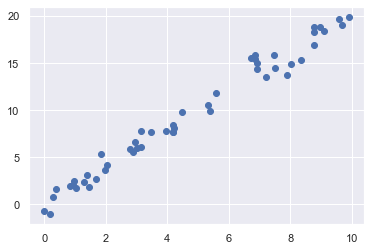

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x -5 + rng.randn(50)
plt.scatter(x, y)

Воспользуемся оценивателем LinearRegression из библиотеки Scikit-Learn для обучения на этих данных и поиска оптимальной прямой

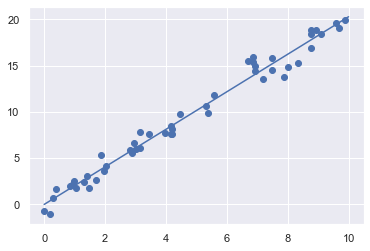

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)

Подбираемые параметры модели (в библиотеке Scikit-Learn всегда содержат в конце знак подчеркивания) включают угловой коэффициент и точку пересечения с осью координат. В данном случае соответствующие параметры — coef_и intercept_

In [ ]:
print("Угловой коэффициент: ", model.coef_[0])
print("Точка пересечения  с осью координат:", model.intercept_)

Угловой коэффициент:  2.027208810360696
Точка пересечения  с осью координат: 0.001422914446793655


Возможности оценивателя LinearRegression намного шире этого: помимо аппроксимации прямыми линиями, он может также работать с многомерными 
линейными моделями вида:
y = a0 + a1x1+a2x2+… с несколькими величинами x. 
Геометрически это подобно подбору плоскости для точек в трех измерениях или гиперплоскости для точек в пространстве с еще большим числом измерений.

#Полиномиальные базисные функции

In [ ]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

После такого преобразования можно воспользоваться линейной моделью для подбора намного более сложных зависимостей между величинами x и y. 

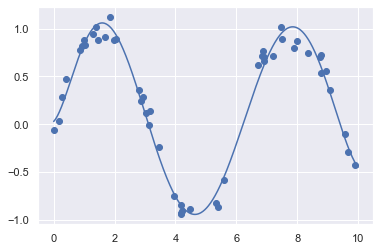

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50) #зашумленная синусоида
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)

#Регуляризация

Применение базисных функций в линейной модели делает ее намного гибче, но также и быстро приводит к переобучению.
Например, если выбрать слишком много базисных функций, мы в итоге получим не слишком хорошие результаты. Модель будет переобученной

##Гребневая регрессия (L2 -регуляризация)

Самый популярный вид регуляризации — гребневая регрессия (ridge regression), или L2-регуляризация, также иногда называемая регуляризацией Тихонова (Tikhonov regularization). 
Она заключается в наложении штрафа на сумму квадратов (евклидовой нормы) коэффициентов модели. 
Этот тип модели со штрафом встроен в библиотеку Scikit-Learn в виде оценивателя Ridge

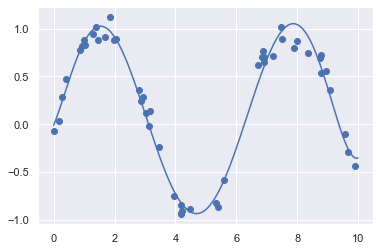

In [ ]:
from sklearn.linear_model import Ridge
model = make_pipeline(PolynomialFeatures(7), Ridge(alpha=0.1)) # Гребневая регрессия
model.fit(x[:, np.newaxis], y)
plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))


Параметр α служит для управления сложностью получаемой в итоге модели. 
В предельном случае α → 0 мы получаем результат, соответствующий стандартной линейной регрессии; 
В предельном случае α → ∞ будет происходить подавление любого отклика модели.

##Лассо-регуляризация (L1 )

Этот тип регуляризации  включает штрафование на сумму абсолютных значений (L1-норма)коэффициентов регрессии.
Хотя концептуально эта регрессия очень близка к гребневой, результаты их могут очень сильно различаться.
Например, по геометрическим причинам лассо-регрессия любит разреженные модели, то есть она по возможности делает коэффициенты 
модели равными нулю.

c:\Users\Kseniya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.826e+00, tolerance: 2.065e-03
  model = cd_fast.enet_coordinate_descent(


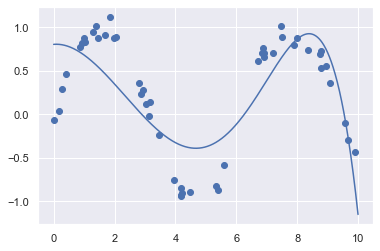

In [ ]:
from sklearn.linear_model import Lasso
model = make_pipeline(PolynomialFeatures(7), Lasso(alpha=0.001)) # Лассо-регуляризация
model.fit(x[:, np.newaxis], y)
plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

При использовании штрафа лассо-регрессии большинство коэффициентов в точности равны нулю, а функциональное поведение моделируется небольшим подмножеством из имеющихся базисных функций.

#Пример решения задачи регрессии для датасета 

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [2]:
wine_data = load_wine()
X = pd.DataFrame(wine_data['data'], columns=wine_data['feature_names'])
y = wine_data['target']

In [3]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff89bd17e20>,
      dtype=object)

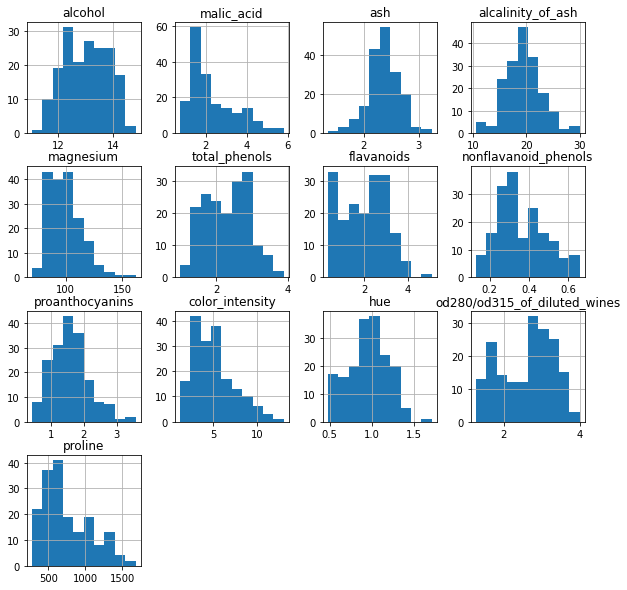

In [4]:
X.hist(X.columns, figsize=(10, 10))

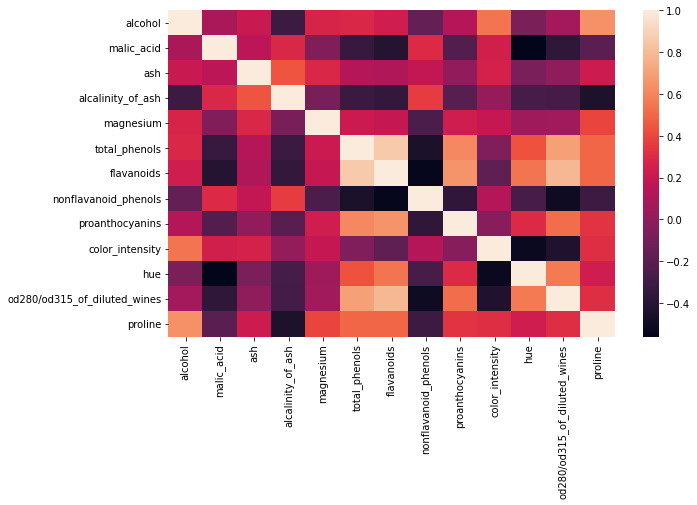

In [5]:
plt.figure(figsize = (10,6))
sns.heatmap(X.corr())

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=99, stratify=y
)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)
test_predictions = regressor.predict(X_test)

print('test mse: ', mean_squared_error(y_test, test_predictions))
print('r2 score: ', r2_score(y_test, test_predictions))
print('coef: ',regressor.coef_)

test mse:  0.06962900442881437
r2 score:  0.8854832617515946
coef:  [-0.08429519  0.03148265 -0.02639522  0.12131381 -0.02269847  0.10529297
 -0.35593223 -0.036753    0.02885449  0.17719586 -0.03740377 -0.18503377
 -0.27013274]
